# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.


__________________________

## Etapa 2 Crisp-DM: Entendimento dos dados

A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis, sendo a variável renda a nossa variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela abaixo.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.

### Dicionário de dados:



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de referência de coleta das variáveis          | texto        |
| id_cliente              |  Código de identificação do cliente                 | inteiro      |
| sexo                    |  Sexo do cliente                                    | M/F          |
| posse_de_veiculo        |  Indica se o cliente possui veículo                 | binária      |
| posse_de_imovel         |  Indica se o cliente possui imóvel                  | binária      |
| qtd_filhos              |  Quantidade de filhos do cliente                    | inteiro      |
| tipo_renda              |  Tipo de renda do cliente                           | texto        |
| educacao                |  Grau de instrução do cliente                       | texto        |
| estado_civil            |  Estado civil do cliente                            | texto        |
| tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)| texto        |
| idade                   |  Idade do cliente                                   | texto        |
| tempo_emprego           |  Tempo no emprego atual                             | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | float        |
| **renda**               |  Renda em reais                                     | float        |



#### Carregando os pacotes


In [386]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

#instalação de pacotes:
!pip install ydata_profiling 
!pip install --upgrade ipywidgets
!pip install --upgrade jupyterlab_widgets

from ydata_profiling import ProfileReport


#### Carregando os dados


In [307]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [304]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [310]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Avaliando a distribuição de todas as variáveis. 

In [312]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [314]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Para uma primeira explanação do problema e entendimento dos dados vamos ver nossa variável resposta (renda) com as variáveis: educação, posse de veículo, posse de imóvel e tempo de emprego.

### 1. Distribuição da renda por nível de educação:

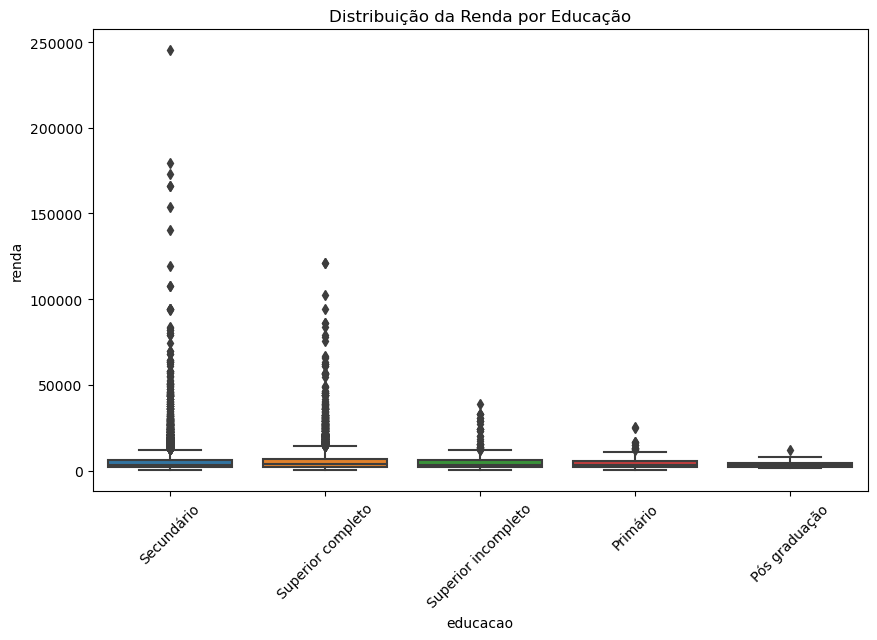

In [318]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='renda', data=renda)
plt.title('Distribuição da Renda por Educação')
plt.xticks(rotation=45)
plt.show()


### 2. Distribuição da renda para quem possui ou não veículo:

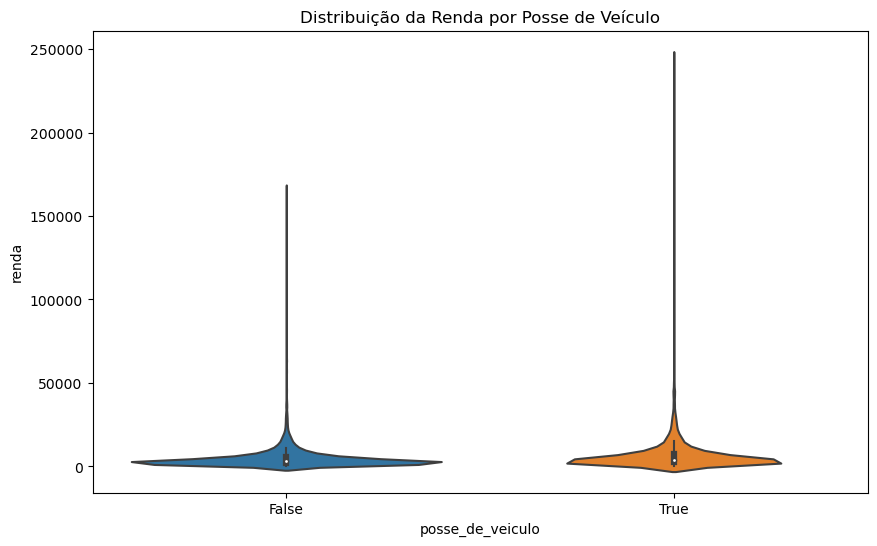

In [320]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='posse_de_veiculo', y='renda', data=renda)
plt.title('Distribuição da Renda por Posse de Veículo')
plt.show()


### 3. Distribuição da renda para quem possui ou não imóvel:

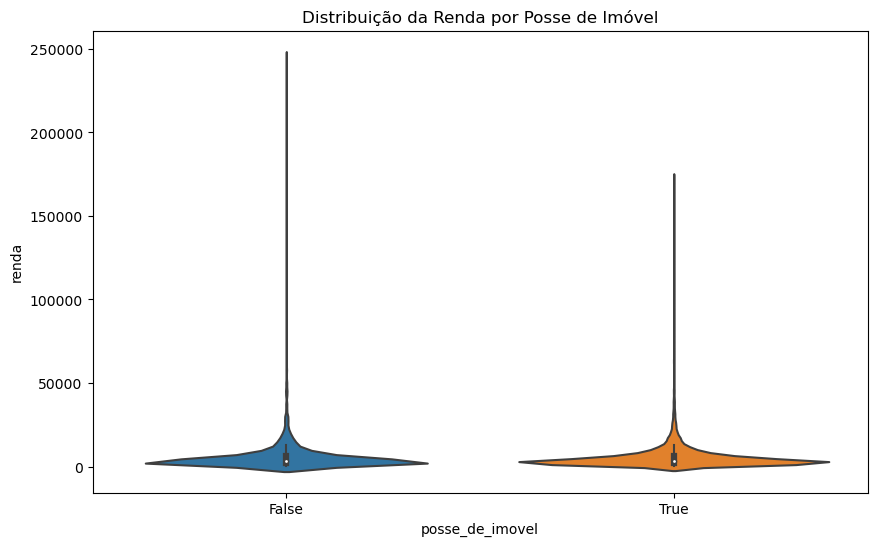

In [322]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='posse_de_imovel', y='renda', data=renda)
plt.title('Distribuição da Renda por Posse de Imóvel')
plt.show()


### 4. Relação entre renda e tempo de emprego:

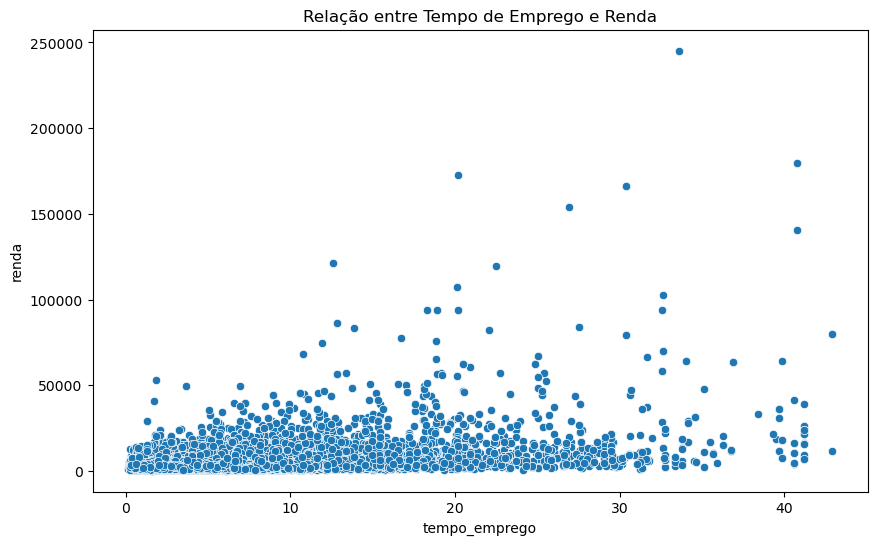

In [324]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=renda)
plt.title('Relação entre Tempo de Emprego e Renda')
plt.show()


### Entendimento dos dados - Bivariadas




##### Apresentamos diversas combinações possíveis para entendermos as relações com nossa variável resposta renda.

### 1. Relação entre Renda e Educação:

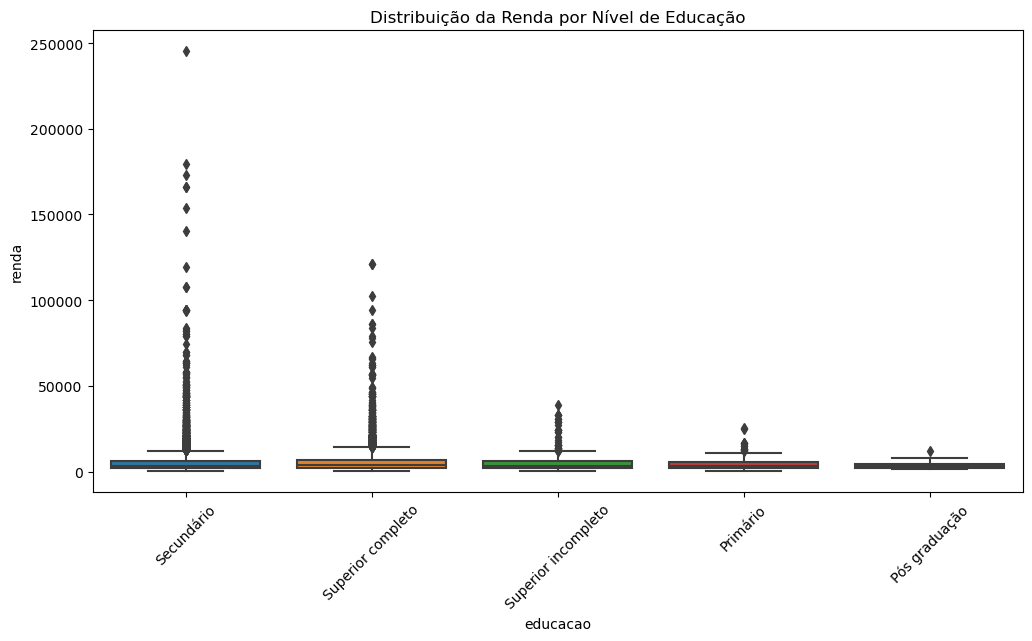

In [326]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='educacao', y='renda', data=renda)
plt.title('Distribuição da Renda por Nível de Educação')
plt.xticks(rotation=45)
plt.show()


### 2. Relação entre Renda e Posse de Veículo:

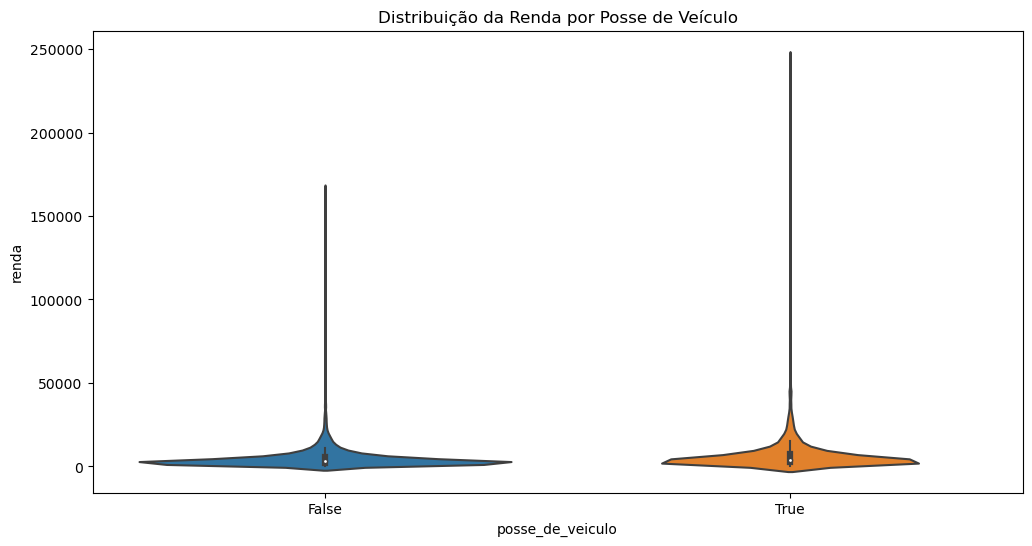

In [328]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='posse_de_veiculo', y='renda', data=renda)
plt.title('Distribuição da Renda por Posse de Veículo')
plt.show()


### 3. Relação entre Renda e Posse de Imóvel:

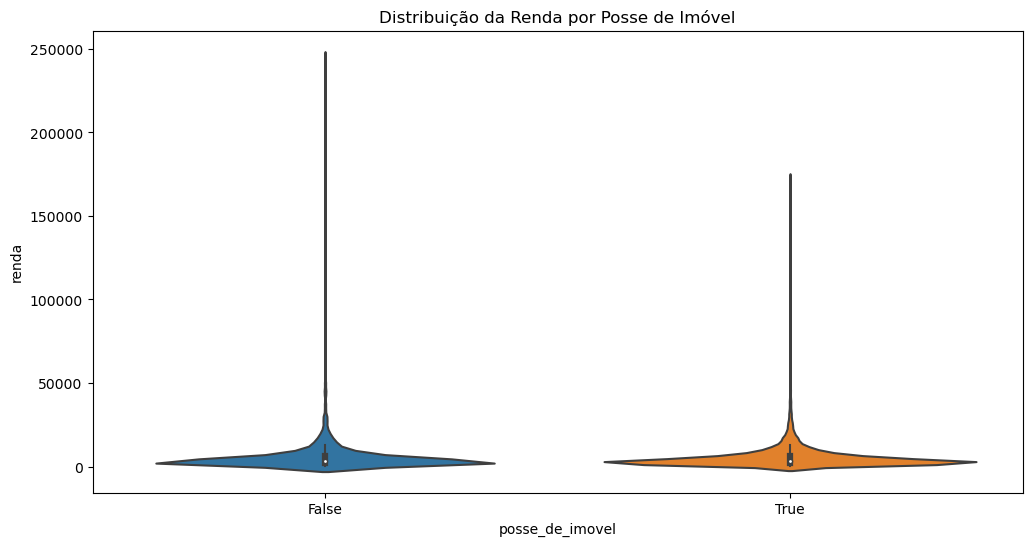

In [330]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='posse_de_imovel', y='renda', data=renda)
plt.title('Distribuição da Renda por Posse de Imóvel')
plt.show()


### 4. Relação entre Renda e Tempo de Emprego:

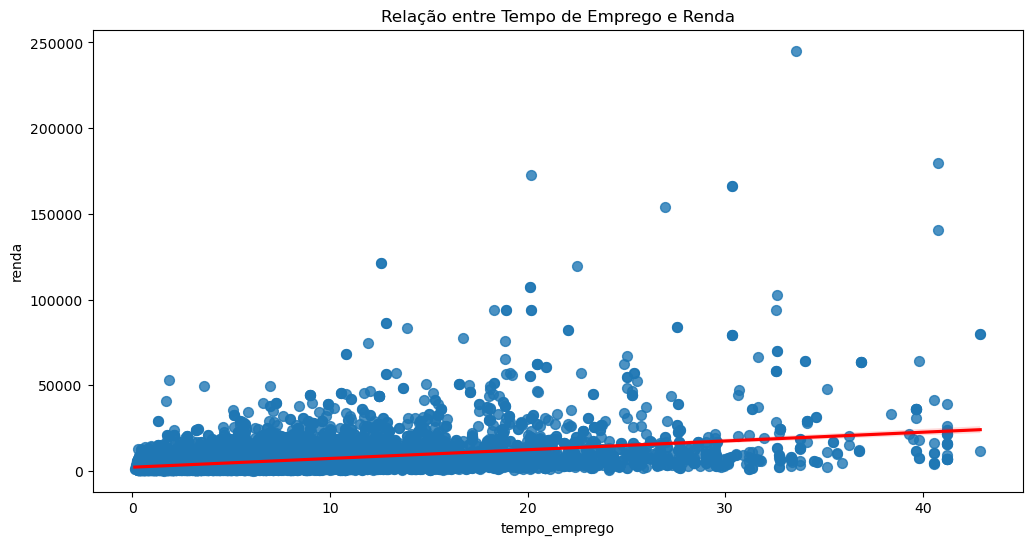

In [332]:
plt.figure(figsize=(12, 6))
sns.regplot(x='tempo_emprego', y='renda', data=renda, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Relação entre Tempo de Emprego e Renda')
plt.show()


### 5. Relação entre Educação e Posse de Veículo:

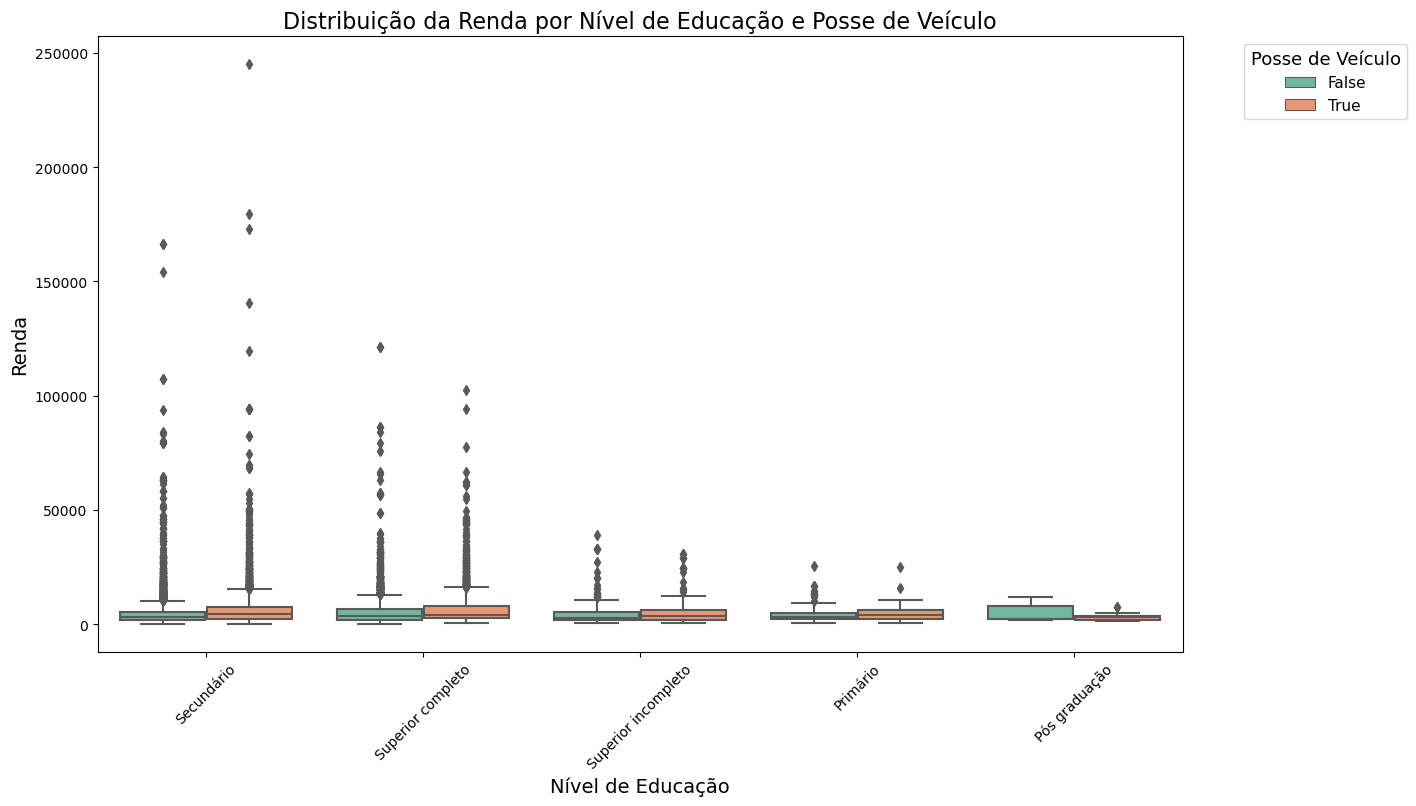

In [334]:
plt.figure(figsize=(14, 8))

# Gráfico de boxplot com cores distintas para posse de veículo
sns.boxplot(x='educacao', y='renda', hue='posse_de_veiculo', data=renda, palette='Set2')

# Melhorar a legibilidade dos rótulos
plt.title('Distribuição da Renda por Nível de Educação e Posse de Veículo', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=14)
plt.ylabel('Renda', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Posse de Veículo', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()



### 6. Relação entre Educação e Posse de Imóvel:

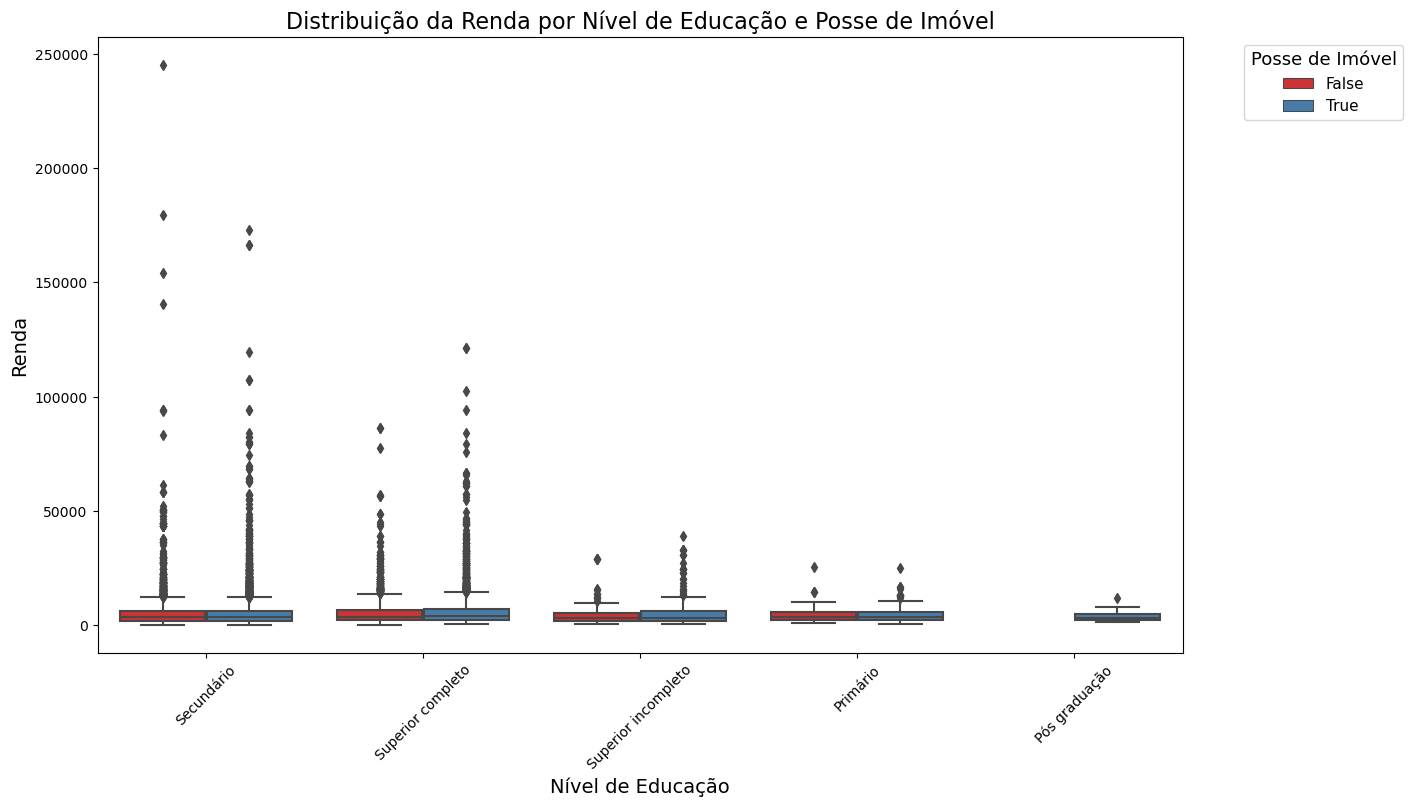

In [336]:
plt.figure(figsize=(14, 8))

# Gráfico de boxplot com cores distintas para posse de imóvel
sns.boxplot(x='educacao', y='renda', hue='posse_de_imovel', data=renda, palette='Set1')

# Melhorar a legibilidade dos rótulos
plt.title('Distribuição da Renda por Nível de Educação e Posse de Imóvel', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=14)
plt.ylabel('Renda', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Posse de Imóvel', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()



_________________

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção dos dados adequados conforme as variáveis escolhidas na etapa anterior.**
 - **limpeza de dados, identificação e tratamento de dados faltantes.**
 - **construção de novas variáveis, caso pertinente.**
 - **formatação dos dados deixando em formatos úteis.**



In [339]:
# Verificando dados faltantes:
missing_data = renda.isnull().sum()
missing_data_percentage = (missing_data / len(renda)) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_summary)


                       Missing Values  Percentage
Unnamed: 0                          0    0.000000
data_ref                            0    0.000000
id_cliente                          0    0.000000
sexo                                0    0.000000
posse_de_veiculo                    0    0.000000
posse_de_imovel                     0    0.000000
qtd_filhos                          0    0.000000
tipo_renda                          0    0.000000
educacao                            0    0.000000
estado_civil                        0    0.000000
tipo_residencia                     0    0.000000
idade                               0    0.000000
tempo_emprego                    2573   17.153333
qt_pessoas_residencia               0    0.000000
renda                               0    0.000000


In [341]:
# Remover registros com dados faltantes
renda_cleaned = renda.dropna()


In [343]:
# Verificar dados faltantes após a remoção
missing_data_after = renda_cleaned.isnull().sum()
missing_data_after_percentage = (missing_data_after / len(renda_cleaned)) * 100
missing_data_after_summary = pd.DataFrame({'Missing Values': missing_data_after, 'Percentage': missing_data_after_percentage})
print("Dados Faltantes Após a Remoção:")
print(missing_data_after_summary)


Dados Faltantes Após a Remoção:
                       Missing Values  Percentage
Unnamed: 0                          0         0.0
data_ref                            0         0.0
id_cliente                          0         0.0
sexo                                0         0.0
posse_de_veiculo                    0         0.0
posse_de_imovel                     0         0.0
qtd_filhos                          0         0.0
tipo_renda                          0         0.0
educacao                            0         0.0
estado_civil                        0         0.0
tipo_residencia                     0         0.0
idade                               0         0.0
tempo_emprego                       0         0.0
qt_pessoas_residencia               0         0.0
renda                               0         0.0


In [345]:
# Verificando os tipos de dados das colunas:
print(renda.dtypes)


Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object


_________________

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa realizamos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo: Random Forest:


Mean Squared Error: 47205136.29460591
R² Score: 0.28299807870439075


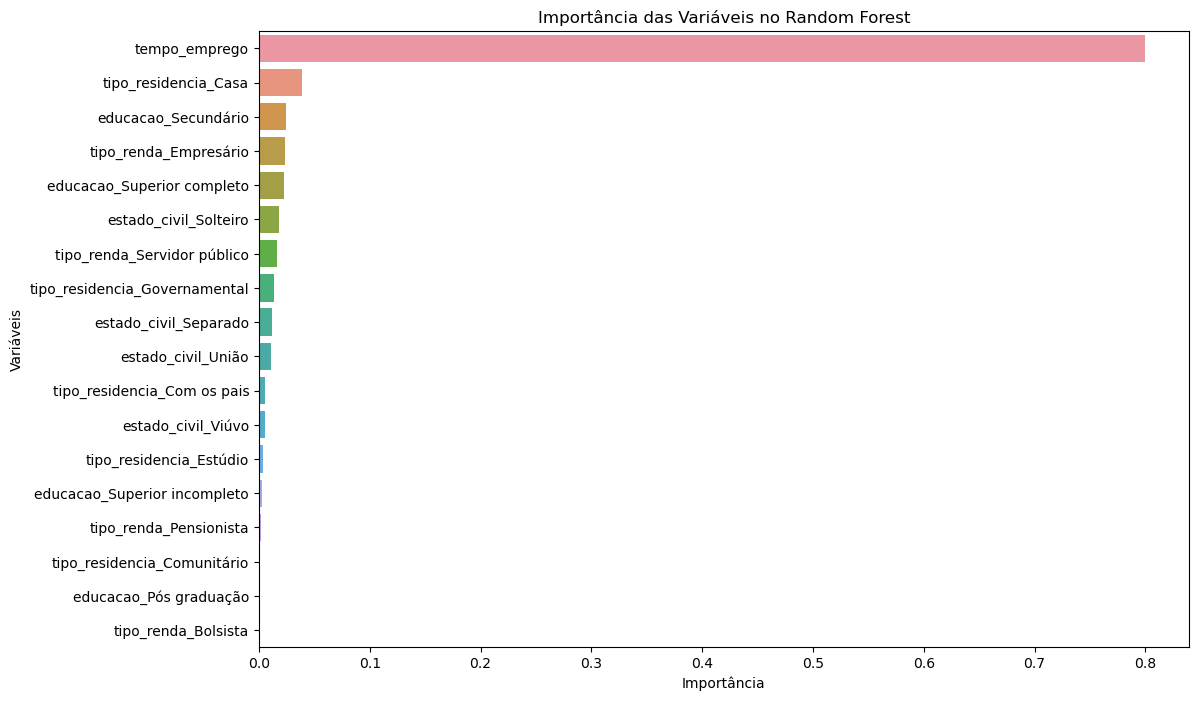

In [388]:
# Converter a data_ref para datetime se necessário
renda['data_ref'] = pd.to_datetime(renda['data_ref'], errors='coerce')

# Selecionar as variáveis de interesse
selected_features = ['educacao', 'tipo_renda', 'estado_civil', 'tipo_residencia', 'tempo_emprego']
X = renda[selected_features]
y = renda['renda']

# Codificar variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Tratar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = imputer.fit_transform(X_encoded)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.3, random_state=42)

# Instanciar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Análise das Importâncias das Variáveis
importances = rf_model.feature_importances_
feature_names = X_encoded.columns

# Ordenar e plotar as importâncias
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Importância das Variáveis no Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()



_________________

## Etapa 5 Crisp-DM: Avaliação dos resultados


### Nessa etapa vamos demonstrar:

#### 1. Análise Descritiva dos Dados

Examinamos as principais características dos dados, como distribuição da variável alvo (renda), distribuição das variáveis categóricas e numéricas, e identificando possíveis correlações.

#### 2. Interpretação dos Resultados
Discutimos os insights obtidos a partir dos dados e do modelo, incluindo possíveis recomendações para a instituição financeira.

         Unnamed: 0                       data_ref    id_cliente  \
count  15000.000000                          15000  15000.000000   
mean    7499.500000  2015-08-01 06:23:59.999999744   8304.871400   
min        0.000000            2015-01-01 00:00:00      1.000000   
25%     3749.750000            2015-04-01 00:00:00   4181.000000   
50%     7499.500000            2015-08-01 00:00:00   8297.000000   
75%    11249.250000            2015-12-01 00:00:00  12403.000000   
max    14999.000000            2016-03-01 00:00:00  16649.000000   
std     4330.271354                            NaN   4797.780446   

         qtd_filhos         idade  tempo_emprego  qt_pessoas_residencia  \
count  15000.000000  15000.000000   12427.000000           15000.000000   
mean       0.432333     43.882333       7.722635               2.206400   
min        0.000000     22.000000       0.117808               1.000000   
25%        0.000000     34.000000       2.973973               2.000000   
50%        0

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


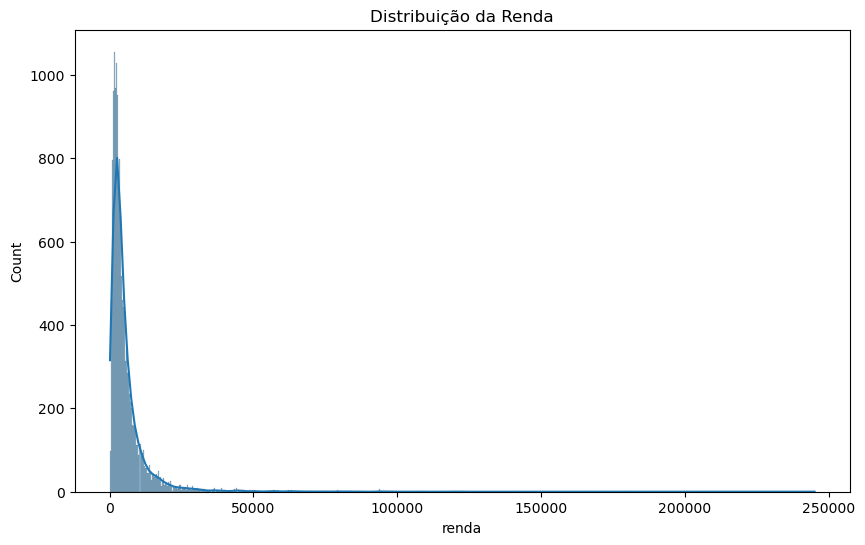

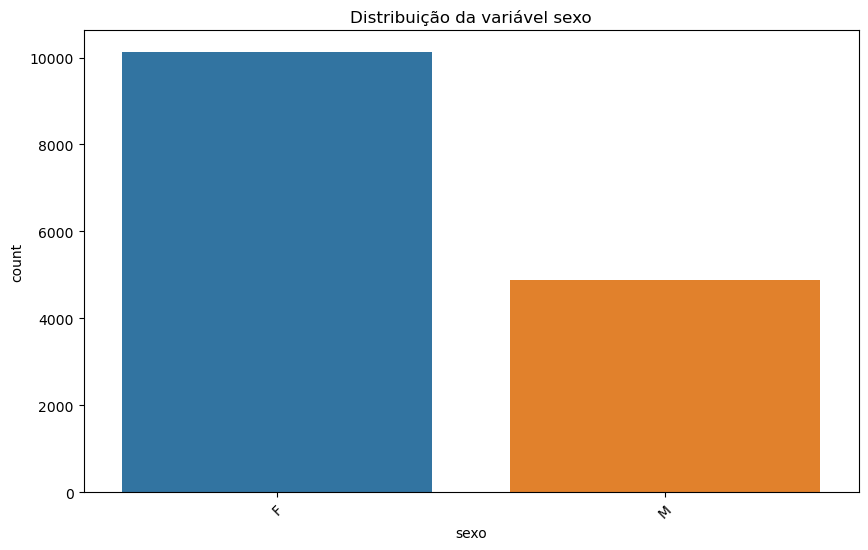

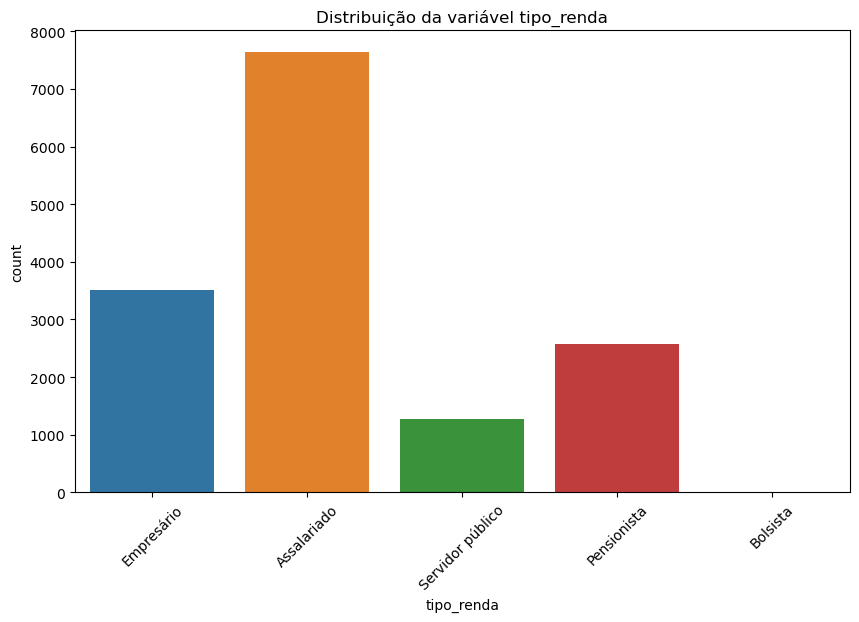

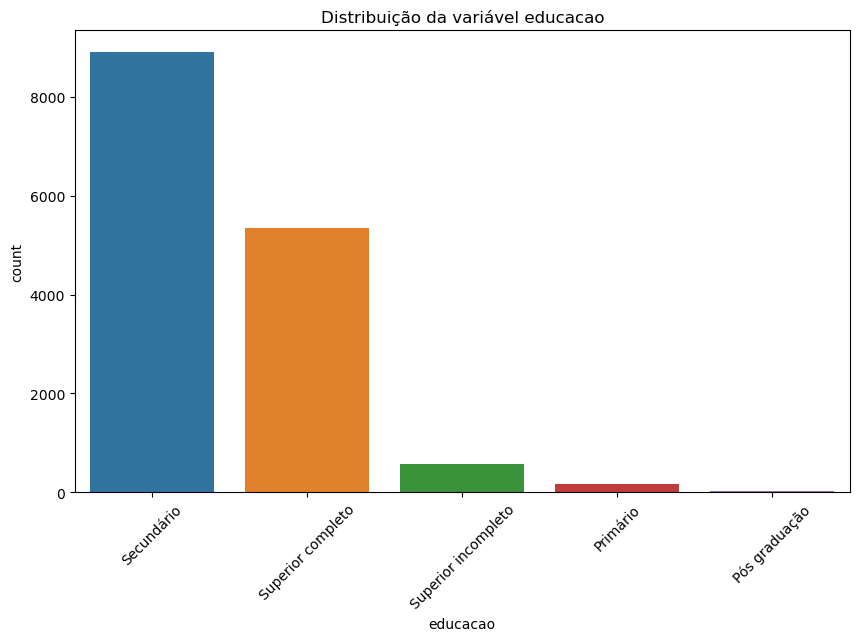

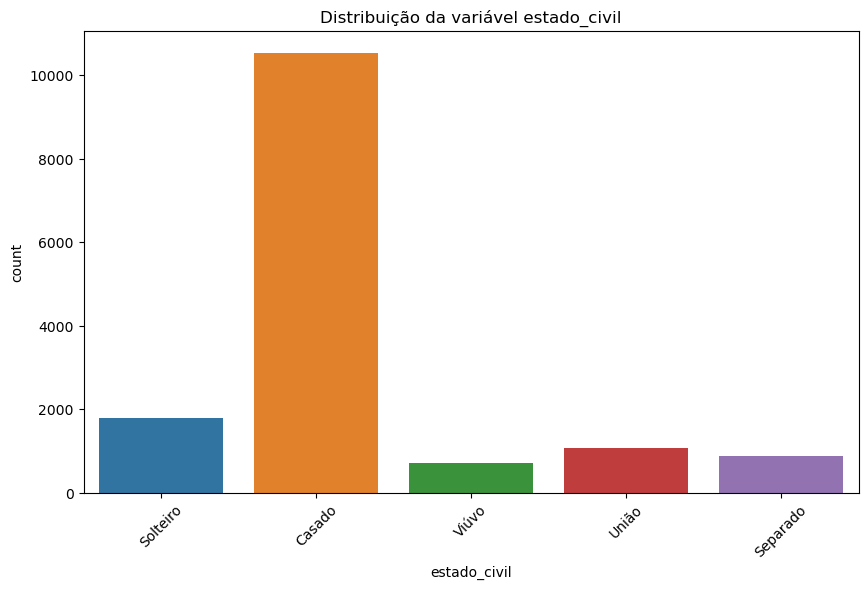

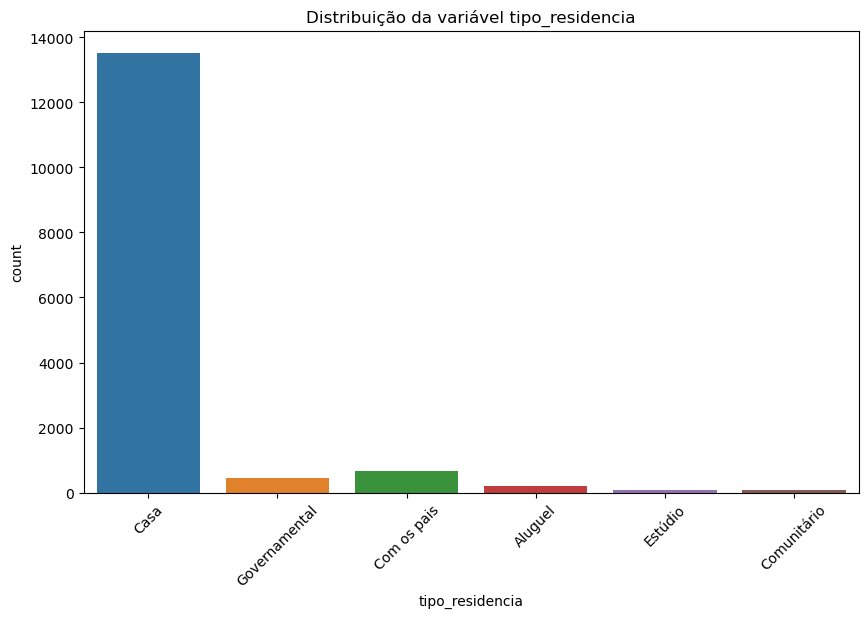

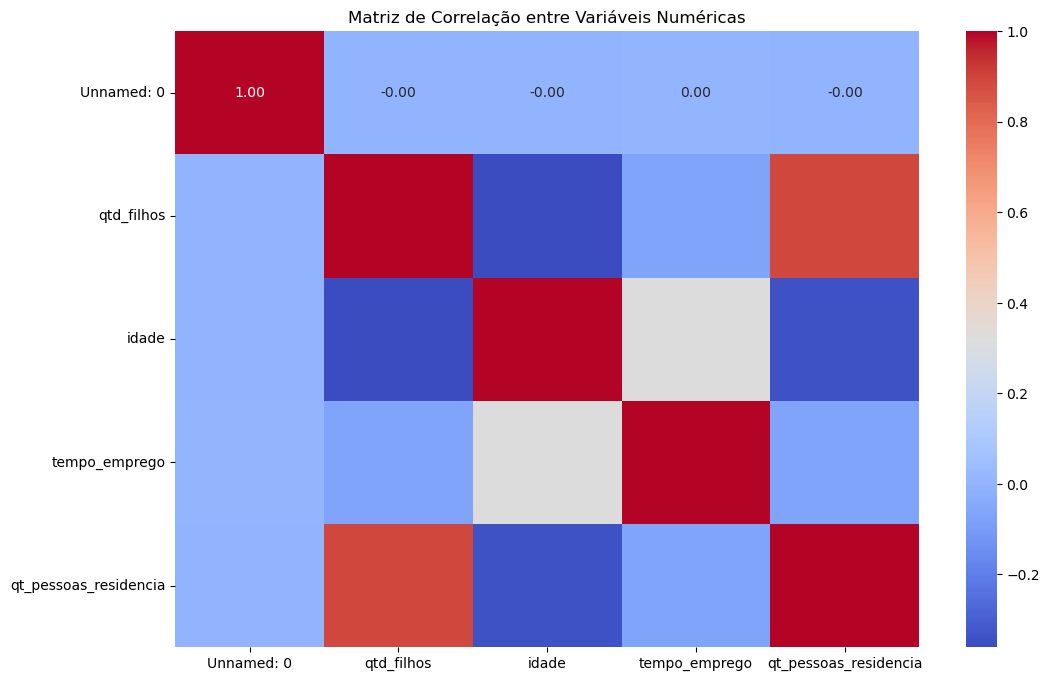

In [355]:
# Análise descritiva das variáveis numéricas:
print(renda.describe())

# Distribuição da variável resposta (renda)
plt.figure(figsize=(10, 6))
sns.histplot(renda['renda'], kde=True)
plt.title('Distribuição da Renda')
plt.show()

# Distribuição das variáveis categóricas
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=renda)
    plt.title(f'Distribuição da variável {col}')
    plt.xticks(rotation=45)
    plt.show()

# Correlação entre variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(renda[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


### Com base na análise e avaliação, podemos interpretar os resultados da seguinte forma:



##### > Perfil de Renda: O modelo pode ajudar a instituição financeira a identificar clientes com perfis de renda semelhantes sem a necessidade de documentação extra.

##### > Variáveis Relevantes: Variáveis como tempo de emprego, educação, posse de veículo e posse de imóveis podem ser determinantes na estimativa da renda, influenciando decisões como limite de crédito.

##### > Recomendações: A instituição pode considerar a automatização do processo de concessão de crédito com base nas variáveis identificadas, melhorando a experiência do cliente e a eficiência do processo.

### Conclusão:
##### Este fluxo de trabalho fornece um caminho estruturado para análise e modelagem preditiva da renda dos clientes. 

_________________

## Etapa 6 Crisp-DM: Implantação
Nessa etapa escolhemos apresentar nossos dados no Streamlit.

_________________